In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

In [57]:
df= pd.read_csv("data/insurance.csv")

### EDA & Analysis

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df.shape

(1338, 7)

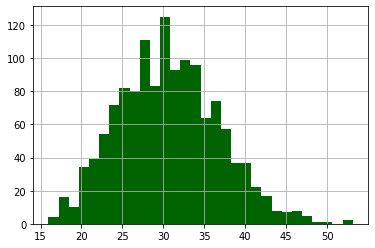

In [97]:
df['bmi'].hist(bins=30, color='darkgreen', alpha=1)
plt.show()

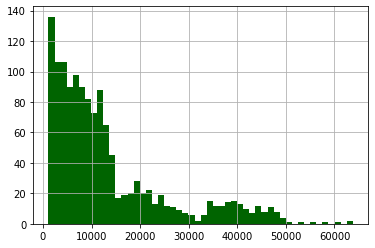

In [100]:
df['charges'].hist(bins=50, color='darkgreen', alpha=1)
plt.show()

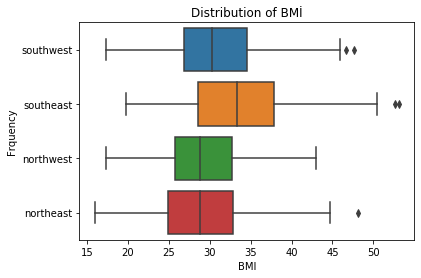

In [63]:
sns.boxplot(data=df, x="bmi", y="region")
plt.xlabel('BMI')
plt.ylabel('Frquency')
plt.title('Distribution of BMİ')
plt.show()

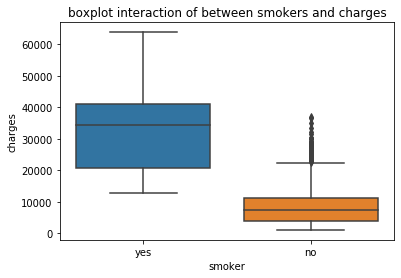

In [64]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('boxplot interaction of between smokers and charges')
plt.show()

### Regresja liniowa - ręczna

In [92]:
charge = df['charges'].to_numpy()
charge

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

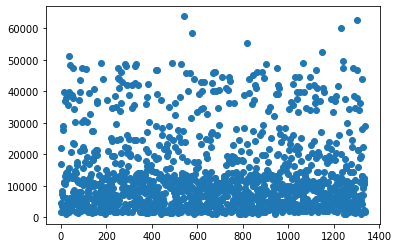

In [93]:
plt.plot(charge, linestyle='none', marker='o')
plt.show()

In [95]:
A = (0, charge[0])
B = (charge.size-1, charge[charge.size-1])
print(f'A = {A}, B = {B}')

A = (0, 16884.924), B = (1337, 29141.3603)


In [101]:
a = (B[1]-A[1])/(B[0]-A[0])
b = A[1]-a*A[0]
print("a = {0:.3f}, b = {1}".format(a,b))

a = 9.167, b = 16884.924


In [102]:
def linear_function(a,b,x):
    return a*x+b

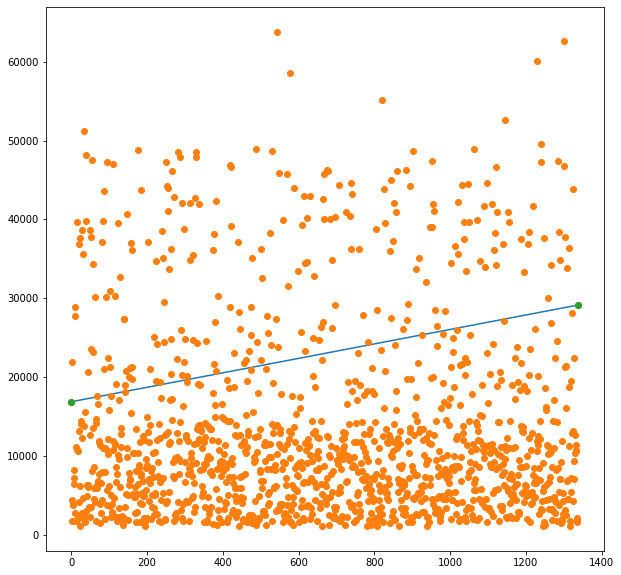

In [107]:
fig = plt.figure(figsize=(10,10))
xDraw = np.arange(math.floor(A[0])-1, math.ceil(B[0])+2)
yDraw = linear_function(a,b,xDraw)
plt.plot(xDraw, yDraw)
plt.plot(charge, linestyle="none", marker='o')
plt.plot([A[0], B[0]], [A[1], B[1]], linestyle="none", marker='o', markersize=6)
plt.show()

### Implementacja równania regresji liniowej oraz współczynnik determinacji

In [112]:
y = charge
x = np.arange(0, charge.size, 1)
print("x.shape", x.shape)
print("y.shape", y.shape)

x.shape (1338,)
y.shape (1338,)


In [113]:
y,x

(array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]), array([   0,    1,    2, ..., 1335, 1336, 1337]))

In [117]:
x_mean = x.mean()
x_mean

668.5

In [118]:
y_mean = y.mean()
y_mean

13270.422265141257

In [119]:
x_sub = x-x_mean
x_sub

array([-668.5, -667.5, -666.5, ...,  666.5,  667.5,  668.5])

In [120]:
y_sub = y-y_mean
y_sub

array([  3614.50173486, -11544.86996514,  -8820.96026514, ...,
       -11640.58876514, -11262.47726514,  15870.93803486])

In [121]:
x_sub_times_y_sub = x_sub*y_sub
x_sub_times_y_sub

array([-2416294.40975307,  7706200.70173179,  5879170.01671665, ...,
       -7758452.41196665, -7517703.57448179, 10609722.07630307])

In [122]:
x_sub_sq = np.square(x_sub)
x_sub_sq

array([446892.25, 445556.25, 444222.25, ..., 444222.25, 445556.25,
       446892.25])

In [123]:
xy_sum = x_sub_times_y_sub.sum()
xy_sum

-21099496.012768462

In [124]:
x_sum = x_sub_sq.sum()
x_sum

199612094.5

In [125]:
a = xy_sum/x_sum
a

-0.10570249295574854

In [126]:
b = y_mean - a*x_mean
b

13341.084381682174

In [127]:
y_ref = y
y_pred = linear_function(a,b,x)

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(y_ref, y_pred)

1.1374617789328134e-05